## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
data_df=pd.read_csv('C:\AIML\Master_Models\students-data.csv',sep=';')
data_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
data_df.shape

(395, 33)

## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [4]:
data_df.index.rename(name='number',inplace=True) # Rename row index title
data_df.head(1) #check for change of row index title

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6


In [5]:
data_df.info()
#data_df.isnull().any() # check for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [6]:
data_df.describe(include=[np.object]).transpose() #check for abnormal value for catagorical data

,count,unique,top,freq
school,395,2,GP,349
sex,395,2,F,208
address,395,2,U,307
famsize,395,2,GT3,281
Pstatus,395,2,T,354
Mjob,395,5,other,141
Fjob,395,5,other,217
reason,395,4,course,145
guardian,395,3,mother,273
schoolsup,395,2,no,344


In [7]:
data_df.describe(include=[np.number]).transpose() #check for abnormal value for numeric data

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


#There are no missing entires.
#However,G2 and G3 have entires with 0 grades in both columns,which implies some student maynot have given exams/submitted assignments.
#These entries will not be deleted from data frame and considered as failed for prediction analysis
#Seperate anlaysis can also be planned without these entires in case required

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [8]:
data_df.select_dtypes(include='object').dtypes

school        object
sex           object
address       object
famsize       object
Pstatus       object
Mjob          object
Fjob          object
reason        object
guardian      object
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
dtype: object

## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [9]:
data_df.select_dtypes(include='number').apply(np.var,axis=0) #variannce of all numeric colums

age            1.624163
Medu           1.195411
Fedu           1.181183
traveltime     0.485281
studytime      0.702541
failures       0.551617
famrel         0.801961
freetime       0.995199
goout          1.236251
Dalc           0.791412
Walc           1.654478
health         1.928050
absences      63.887390
G1            10.989162
G2            14.113097
G3            20.936478
dtype: float64

In [10]:
data_df.select_dtypes(include='number').apply(np.var,axis=0)<1 #select numberic columns with var <1

age           False
Medu          False
Fedu          False
traveltime     True
studytime      True
failures       True
famrel         True
freetime       True
goout         False
Dalc           True
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [11]:
col_select=data_df.select_dtypes(include='number').columns[data_df.select_dtypes(include='number').apply(np.var,axis=0)<1] 
col_select # selected columns names based on variance<1

Index(['traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'Dalc'], dtype='object')

In [12]:
data_df.drop(col_select,axis=1,inplace=True) #drop columns

In [13]:
data_df.columns.isin(['traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'Dalc']) #check for column drop

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [14]:
data_df.head() # check overall dataframe

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,3,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,2,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,2,2,5,4,6,10,10


## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
label_encode=LabelEncoder() #create custom object

In [17]:
temp_col=data_df.select_dtypes(include='object').columns # list of data frame with dtype object
temp_col

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [18]:
data_df[temp_col]=data_df[temp_col].apply(lambda x :label_encode.fit_transform(x),axis=0) #apply function to encode 
data_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,6,10,10


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [19]:
data_df['G1_binary']=data_df['G1'].apply(lambda x :0 if x<10 else 1)
data_df['G2_binary']=data_df['G2'].apply(lambda x :0 if x<10 else 1)
data_df['G3_binary']=data_df['G3'].apply(lambda x :0 if x<10 else 1)  
data_df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Walc,health,absences,G1,G2,G3,G1_binary,G2_binary,G3_binary
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,4,1,3,6,5,6,6,0,0,0
1,0,0,17,1,0,1,1,1,0,2,...,3,1,3,4,5,5,6,0,0,0
2,0,0,15,1,1,1,1,1,0,2,...,2,3,3,10,7,8,10,0,0,1
3,0,0,15,1,0,1,4,2,1,3,...,2,1,5,2,15,14,15,1,1,1
4,0,0,16,1,0,1,3,3,2,2,...,2,2,5,4,6,10,10,0,1,1


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [20]:
y=data_df['G3_binary']
X=data_df.drop(['G3','G2','G1','G3_binary'],axis=1)

In [21]:
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,nursery,higher,internet,romantic,goout,Walc,health,absences,G1_binary,G2_binary
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,1,0,0,4,1,3,6,0,0
1,0,0,17,1,0,1,1,1,0,2,...,0,1,1,0,3,1,3,4,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,1,0,2,3,3,10,0,0
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,1,2,1,5,2,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,1,0,0,2,2,5,4,0,1


In [22]:
y.head()

number
0    0
1    0
2    1
3    1
4    1
Name: G3_binary, dtype: int64

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

In [23]:
import seaborn as sns
sns.set(style="darkgrid")

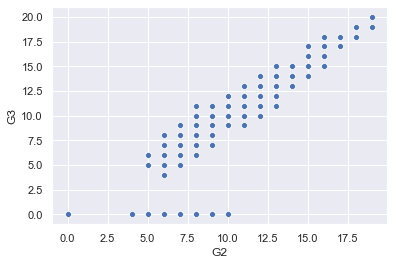

In [24]:
sns.scatterplot(x='G2',y='G3',data=data_df)

The G3 and G2 are highly corelated Thus, the G2 can be a good predictor of the outcome variable, since student doing well in G2 is morely likely to do well in G3 also.
Also some student who didnot do well in G2 , didnot appear in G3(zero grades in G3). They are considered failed in binary classificaiton for analysis and hence shouldnot effect teh analysis even though they donot fall on the linear corelation line

## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

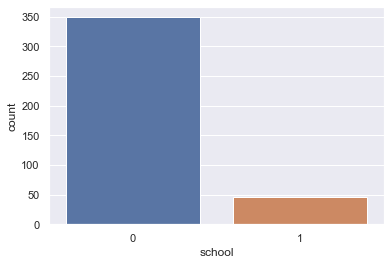

In [25]:
sns.countplot(x='school',data=data_df) #number student in school

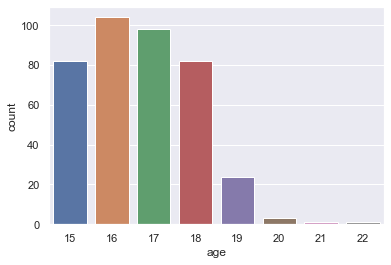

In [26]:
sns.countplot(x='age',data=data_df) #age vs school histogram

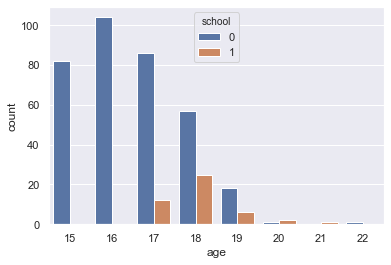

In [27]:
sns.countplot(x='age',data=data_df,hue='school') #age vs school histogram

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=300,random_state=1) #split train and test data
print('Train record %s\nTest record %s'% (X_train.shape,X_test.shape)) # print test and train records shape


Train record (300, 26)
Test record (95, 26)


## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [31]:
model_lr=LogisticRegression(penalty='none',random_state=0,solver='saga',max_iter=2050)

In [32]:
model_lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2050,
                   multi_class='warn', n_jobs=None, penalty='none',
                   random_state=0, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
y_train_predict_lr=model_lr.predict(X_train) #predict train data

In [34]:
model_lr.score(X_train,y_train,) # accuracy  train data

0.9366666666666666

In [35]:
print(classification_report(y_train,y_train_predict_lr)) #F1 score taining data

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       102
           1       0.97      0.93      0.95       198

    accuracy                           0.94       300
   macro avg       0.92      0.94      0.93       300
weighted avg       0.94      0.94      0.94       300



In [36]:
y_test_predict_lr=model_lr.predict(X_test) #predict test data

In [37]:
model_lr.score(X_test,y_test) # accuracy test data

0.9052631578947369

In [38]:
print(classification_report(y_test,y_test_predict_lr)) #F1 score testing data

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        28
           1       0.95      0.91      0.93        67

    accuracy                           0.91        95
   macro avg       0.88      0.90      0.89        95
weighted avg       0.91      0.91      0.91        95



# Naive bayes with Iris data

### Import Iris.csv

In [39]:
Iris_df=pd.read_csv('C:\AIML\Master_Models\Iris.csv')

In [40]:
Iris_df.head() # check data base

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [41]:
Iris_df.info() # check null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal Length (in cm)    150 non-null float64
Sepal Width in (cm)     150 non-null float64
Petal length (in cm)    150 non-null float64
Petal width (in cm)     150 non-null float64
Class                   150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [42]:
Iris_df.describe(include=np.number).transpose() # check relation between mean and median for norm and outlier check

,count,mean,std,min,25%,50%,75%,max
Sepal Length (in cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal Width in (cm),150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
Petal length (in cm),150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
Petal width (in cm),150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [43]:
Iris_df.describe(include=np.object).transpose() #stats of category data

,count,unique,top,freq
Class,150,3,Iris-setosa,50


In [44]:
Iris_df.Class.unique() #check class

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [45]:
y=Iris_df['Class']
X=Iris_df.drop('Class',axis=1)

In [46]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Class, dtype: object

In [47]:
X.head()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Find the distribution of target variable (Class)

In [48]:
Iris_df.groupby(by='Class',axis=0).count()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
Class,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


### Plot the distribution of target variable using histogram

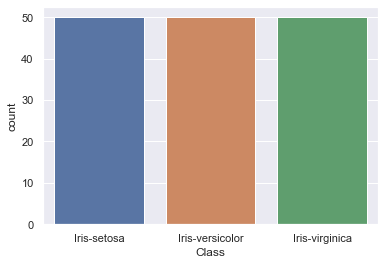

In [49]:
sns.countplot(x='Class',data=Iris_df)

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

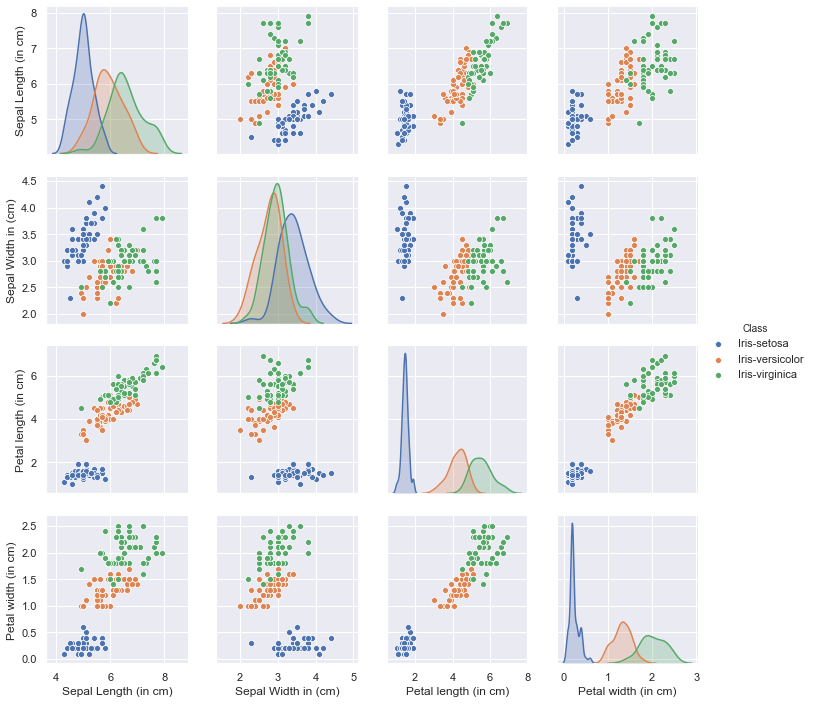

In [50]:
sns.pairplot(Iris_df,hue='Class',diag_kind='kde')

In [51]:
# All 4 variable selected are relevant as they are able  to differentite between classes reasonably well.  
# Order of importance expected is Petal length,Petal width,sepal length and Sepal width.
# Also Petal length,Petal width,sepal length are strongly corelated themselves

### Summary Statistics and explain insights for at least 2 variables

In [52]:
Iris_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sepal Length (in cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal Width in (cm),150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
Petal length (in cm),150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
Petal width (in cm),150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [53]:
# Mean and median of Sepal length and sepal width are almost identical indicating a symetircal normal distribution.
# There are no outliers also as the max and min values are within +/- 3 sigma.

### Correlation among all variables and give your insights

In [54]:
Iris_df.corr()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
Sepal Length (in cm),1.000000,-0.109369,0.871754,0.817954
Sepal Width in (cm),-0.109369,1.000000,-0.420516,-0.356544
Petal length (in cm),0.871754,-0.420516,1.000000,0.962757
Petal width (in cm),0.817954,-0.356544,0.962757,1.000000


In [55]:
# Petal lenth,petal width,sepal are strongly corelated.

### Split data in Training and Validation in 80:20

In [56]:
X_train_Iris,X_test_Iris,y_train_Iris,y_test_Iris= train_test_split(X,y,train_size=0.8,random_state=0)

### Do Feature Scaling

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
sc=StandardScaler()
X_train_Iris_scaled=sc.fit_transform(X_train_Iris)
X_test_Iris_scaled=sc.fit_transform(X_test_Iris)

In [59]:
X_train_Iris_scaled

array([[ 0.61303014,  0.10850105,  0.94751783,  0.73603967],
       [-0.56776627, -0.12400121,  0.38491447,  0.34808318],
       [-0.80392556,  1.03851009, -1.30289562, -1.3330616 ],
       [ 0.25879121, -0.12400121,  0.60995581,  0.73603967],
       [ 0.61303014, -0.58900572,  1.00377816,  1.25331499],
       [-0.80392556, -0.82150798,  0.04735245,  0.21876435],
       [-0.21352735,  1.73601687, -1.19037495, -1.20374277],
       [ 0.14071157, -0.82150798,  0.72247648,  0.47740201],
       [ 0.02263193, -0.12400121,  0.21613346,  0.34808318],
       [-0.09544771, -1.05401024,  0.10361279, -0.03987331],
       [ 1.0853487 , -0.12400121,  0.94751783,  1.12399616],
       [-1.39432376,  0.34100331, -1.41541629, -1.3330616 ],
       [ 1.20342834,  0.10850105,  0.72247648,  1.38263382],
       [-1.04008484,  1.03851009, -1.24663528, -0.81578628],
       [-0.56776627,  1.50351461, -1.30289562, -1.3330616 ],
       [-1.04008484, -2.4490238 , -0.1776889 , -0.29851096],
       [ 0.73110978, -0.

### Train and Fit NaiveBayes Model

In [60]:
from sklearn.naive_bayes import GaussianNB

In [61]:
model_nb=GaussianNB()

In [62]:
model_nb.fit(X_train_Iris_scaled,y_train_Iris)

GaussianNB(priors=None, var_smoothing=1e-09)

In [63]:
y_train_Iris_predict=model_nb.predict(X_train_Iris_scaled)

In [64]:
y_test_Iris_predict=model_nb.predict(X_test_Iris_scaled)

### Print Accuracy and Confusion Matrix and Conclude your findings

In [65]:
model_nb.score(X_train_Iris_scaled,y_train_Iris) #accuracy of train data

0.95

In [66]:
model_nb.score(X_test_Iris_scaled,y_test_Iris) #accuracy of test data

0.8

In [67]:
confusion_matrix(y_train_Iris,y_train_Iris_predict) #confusion matrix of train data

array([[39,  0,  0],
       [ 0, 34,  3],
       [ 0,  3, 41]], dtype=int64)

In [68]:
confusion_matrix(y_test_Iris,y_test_Iris_predict) #confusion matix of test data

array([[11,  0,  0],
       [ 0,  7,  6],
       [ 0,  0,  6]], dtype=int64)

In [69]:
print(classification_report(y_train_Iris,y_train_Iris_predict)) #classification train data

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        39
Iris-versicolor       0.92      0.92      0.92        37
 Iris-virginica       0.93      0.93      0.93        44

       accuracy                           0.95       120
      macro avg       0.95      0.95      0.95       120
   weighted avg       0.95      0.95      0.95       120



In [70]:
print(classification_report(y_test_Iris,y_test_Iris_predict)) # classfication report test data

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.54      0.70        13
 Iris-virginica       0.50      1.00      0.67         6

       accuracy                           0.80        30
      macro avg       0.83      0.85      0.79        30
   weighted avg       0.90      0.80      0.80        30



In [71]:
# Model Findings
#The model is an overfit as the accuracy of the train data is higher than test data.
# Confusion matrix and classfication report shows that class level recall of Iris-versicolor is only 54%
# Predication for Iris-versicolor is spilled over to next class of Iris virginica.
#This is expected as the distribution of features with hue=class in paired plot are having overlap for Iris-versicolor and Iris-virginica. 